# Analyze the loss based on the simulations runtime

In [7]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# os.environ['JAX_PLATFORM_NAME'] = "cpu"
# os.environ['JAX_PLATFORMS'] = "cpu"

In [8]:
import jax.numpy as jnp
import jax

import numpy as onp

import matplotlib.pyplot as plt

from simulation.simulate_full import run_entire_simulation

from analyzers import database, loss as loss_analyzer, defaultvalues as dv

In [9]:
scan_space = jnp.linspace(3.0000, 3.0001, 8)
runtime_values = onp.array([12, 20, 28, 36, 44, 52, 60, 68, 76, 84, 92, 100, 108, 116, 124, 132, 140, 148, 156, 164, 172, 180])
steps = runtime_values * 1000 // 2

In [10]:
def get_sim_result(lj_sigma_oo, runtime):
    return run_entire_simulation(lj_sigma_oo, runtime, dv.N_MOLECULES_PER_AXIS, dv.N_SNAPSHOTS, dv.N_Q, 1)

In [11]:
database.set_filename("../data/loss_analyzer/runtime_scan.npz")

Calculate losses over the scan space for each runtime from the array

In [12]:
all_losses = []

for n_steps in steps:
    existing_keys = database.get_existing_keys()
    if n_steps in existing_keys:
        print(f"Skipping {n_steps}, was already computed")
        continue

    print(f"=== Running for {n_steps} steps ({n_steps // 500}ps) ===")
    reference = get_sim_result(3.188, n_steps)
    losses = []
    for lj_sigma_oo in scan_space:
        pattern = get_sim_result(lj_sigma_oo, n_steps)
        loss = loss_analyzer.L1_loss(pattern, reference)
        losses.append(loss)
        
    jitter = loss_analyzer.get_loss_jitter(losses)
    print(f"Jitter: {jitter}")

    database.save_intermediate_result(n_steps, losses)

Skipping 6000, was already computed
Skipping 10000, was already computed
Skipping 14000, was already computed
Skipping 18000, was already computed
Skipping 22000, was already computed
Skipping 26000, was already computed
Skipping 30000, was already computed
Skipping 34000, was already computed
Skipping 38000, was already computed
Skipping 42000, was already computed
Skipping 46000, was already computed
Skipping 50000, was already computed
Skipping 54000, was already computed
Skipping 58000, was already computed
Skipping 62000, was already computed
Skipping 66000, was already computed
Skipping 70000, was already computed
=== Running for 74000 steps (148ps) ===
Jitter: 0.000173398548788043
=== Running for 78000 steps (156ps) ===
Jitter: 0.00016336958965955
=== Running for 82000 steps (164ps) ===
Jitter: 0.00018135618857492662
=== Running for 86000 steps (172ps) ===
Jitter: 0.000172001517074681
=== Running for 90000 steps (180ps) ===
Jitter: 0.00016894631895645023


# Plot
Skip previous if data is already available

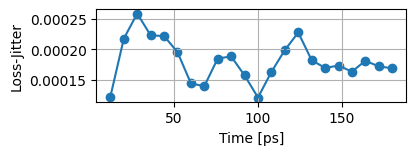

In [14]:
keys, values = database.load_result()
jitter_values = [loss_analyzer.get_loss_jitter(v) for v in values]

plt.plot(keys / 500, jitter_values)
plt.scatter(keys / 500, jitter_values)
plt.xlabel("Time [ps]")
plt.ylabel("Loss-Jitter")

plt.gcf().set_size_inches(4, 1.2)
plt.grid()
plt.savefig("../plots/analysis_loss_runtime.svg")
plt.show()